In [1]:
import numpy as np
import os
import photonics.fluorescence as fl
import matplotlib.pyplot as plt
%matplotlib notebook

# Plot lifetime text file data (CSV format)

In [2]:
# Select the required pump
pump = 1
lamp_delay = 0.1

<IPython.core.display.Javascript object>


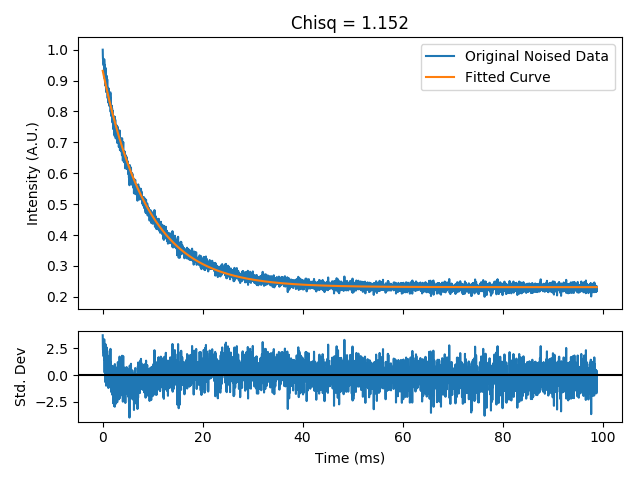

Fitted parameters: A 2073.1, tau 8.935 ms and C 685.4.


In [3]:
directory = './test_data/'
fname = 't12_lifetime.txt'

# Extract data from txt file
data = np.genfromtxt(os.path.join(directory, fname), delimiter=',', dtype=float, skip_header=10, usecols=(0,1))
x = data[:,0]/1E6  # Convert time from us to ms
y = data[:,1]

# Shift time axis to account for the pump and lamp delay. I.e. decay starts at t=0
x = fl.shift_time(x, length=pump+lamp_delay)

# Reject data while pump is on
x, y = fl.reject_time(x, y, reject_start=0, reject_end=0)

# Fit a single exp. decay function
popt = fl.fit_decay(x, y)

# Plot the decay, residuals and fit
fl.plot_decay(x, y, fl.decay_fn, popt, log=False, norm=True);
print("Fitted parameters: A {0:.1f}, tau {1:.3f} ms and C {2:.1f}.".format(*popt))

# Plot Spectrum text file data

<IPython.core.display.Javascript object>


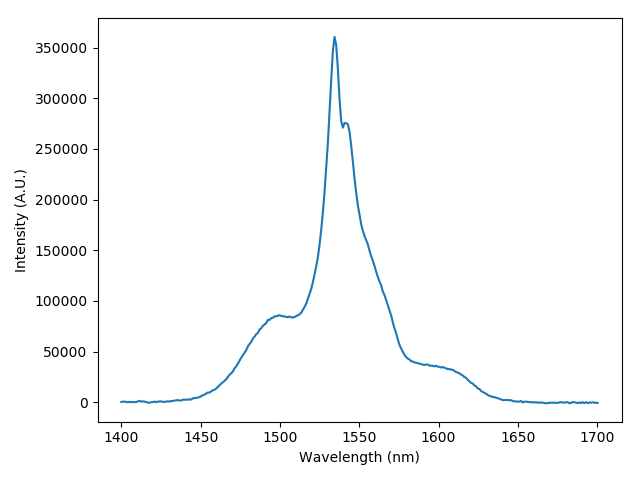

In [7]:
# Extract Data
data = np.genfromtxt(fname='./test_data/t12_spectrum.txt', delimiter=',', dtype=float, skip_header=22, usecols=(0,1))
x = data[:,0]
y = data[:,1]

# Remove the background noise from the data
y = fl.remove_spectrum_noise(x, y)

# Plot the spectrum
fl.plot_spectrum(x, y, norm=False);